# Using SkLearn to Create a Neural Network for Classification

Execute the following command to load the iris dataset into a Python dataframe:

In [1]:
import pandas as pd

# Location of dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign column names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
irisdata = pd.read_csv(url, names=names)

The above script simply downloads the iris data, assigns the names i.e. 'sepal-length', 'sepal-width', 'petal-length', 'petal-width', and 'Class' to the columns of the dataset, and then loads it into the irisdata dataframe.

To see what this dataset actually looks like, execute the following command:

### Data Exploration
We always want to visualize and understand our data first!

In [2]:
print("Samples: {}, Features: {}".format(*irisdata.shape))
irisdata.head()

Samples: 150, Features: 5


,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Wow! Not very many samples. Pretty against our mantra of wanting over 10K samples! But maybe this dataset is easy to classify, AKA not too complicated? Well it only has 4 features so it doesn't seem like we have the curse of dimensionality. Next, lets make a pairplot to see that there are a couple of features which will give a large indication of how to classify our samples (spoiler: petal-length and petal-width are the biggest indicators)

In [3]:
import seaborn as sns
g = sns.pairplot(irisdata, hue="Class")

### Preprocessing
You can see that our dataset has five columns. The task is to predict the class (which are the values in the fifth column) that the iris plant belongs to, which is based upon the sepal-length, sepal-width, petal-length and petal-width (the first four columns). The next step is to split our dataset into attributes and labels. Execute the following script to do so:

In [4]:
# Assign data from first four columns to X variable
X = irisdata.iloc[:, 0:4]

# Assign data from first fifth columns to y variable
y = irisdata.select_dtypes(include=[object])  

In [5]:
y.head()  

,Class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


You can see that the values in the y series are categorical. However, neural networks work better with numerical data. Our next task is to convert these categorical values to numerical values. But first let's see how many unique values we have in our y series. Execute the following script:

In [6]:
y.Class.unique()  

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

We have three unique classes 'Iris-setosa', 'Iris-versicolor' and 'Iris-virginica'. Let's convert these categorical values to numerical values. To do so we will use Scikit-Learn's LabelEncoder class.

Execute the following script:

In [7]:
from sklearn import preprocessing  
le = preprocessing.LabelEncoder()

y = y.apply(le.fit_transform)

### Train Test Split
To avoid over-fitting, we will divide our dataset into training and test splits. The training data will be used to train the neural network and the test data will be used to evaluate the performance of the neural network. This helps with the problem of over-fitting because we're evaluating our neural network on data that it has not seen (i.e. been trained on) before.

To create training and test splits, execute the following script:

In [8]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42) 

The above script splits 80% of the dataset into our training set and the other 20% in to test data.

Feature Scaling
Before making actual predictions, it is always a good practice to scale the features so that all of them can be uniformly evaluated. Feature scaling is performed only on the training data and not on test data. This is because in real world, data is not scaled and the ultimate purpose of the neural network is to make predictions on real world data. Therefore, we try to keep our test data as real as possible.

The following script performs feature scaling:

In [9]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

### Training and Predictions
And now it's finally time to do what you have been waiting for, train a neural network that can actually make predictions. To do this, execute the following script:

In [10]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(
    hidden_layer_sizes=(10,),
    activation='relu',
    solver='sgd',
    batch_size=10,
    learning_rate_init=0.01,
    early_stopping=True,
    validation_fraction=0.2,
    verbose=10,
    random_state=42,
    max_iter=100
)
# from plot_learning_curve import plot_learning_curve
# plot_learning_curve(clf, "title", X_train, y_train.Class)
clf.fit(X_train, y_train.values.ravel())  

Iteration 1, loss = 1.23137937
Validation score: 0.333333
Iteration 2, loss = 0.86068856
Validation score: 0.541667
Iteration 3, loss = 0.62319642
Validation score: 0.750000
Iteration 4, loss = 0.48076679
Validation score: 0.791667
Iteration 5, loss = 0.39532043
Validation score: 0.833333
Iteration 6, loss = 0.34277439
Validation score: 0.833333
Iteration 7, loss = 0.31033248
Validation score: 0.875000
Iteration 8, loss = 0.28286320
Validation score: 0.875000
Iteration 9, loss = 0.25884920
Validation score: 0.833333
Iteration 10, loss = 0.24106418
Validation score: 0.875000
Iteration 11, loss = 0.22792496
Validation score: 0.916667
Iteration 12, loss = 0.20895942
Validation score: 0.916667
Iteration 13, loss = 0.19337502
Validation score: 0.916667
Iteration 14, loss = 0.18527746
Validation score: 0.916667
Iteration 15, loss = 0.17000571
Validation score: 0.916667
Iteration 16, loss = 0.16066578
Validation score: 0.916667
Iteration 17, loss = 0.15023973
Validation score: 0.916667
Iterat

MLPClassifier(activation='relu', alpha=0.0001, batch_size=10, beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.01, max_iter=100, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.2, verbose=10, warm_start=False)

Yes, with Scikit-Learn, you can create neural network with these three lines of code, which all handles much of the leg work for you. Let's see what is happening in the above script. The first step is to import the MLPClassifier class from the sklearn.neural_network library. In the second line, this class is initialized with two parameters.

The first parameter, hidden_layer_sizes, is used to set the size of the hidden layers. In our script we will create three layers of 10 nodes each. There is no standard formula for choosing the number of layers and nodes for a neural network and it varies quite a bit depending on the problem at hand. The best way is to try different combinations and see what works best.

The second parameter to MLPClassifier specifies the number of iterations, or the epochs, that you want your neural network to execute. Remember, one epoch is a combination of one cycle of feed-forward and back propagation phase.

By default the 'relu' activation function is used with 'adam' cost optimizer. However, you can change these functions using the activation and solver parameters, respectively.

In the third line the fit function is used to train the algorithm on our training data i.e. X_train and y_train.

The final step is to make predictions on our test data. To do so, execute the following script:

In [11]:
predictions = clf.predict(X_test)  

### Evaluating the Algorithm
We created our algorithm and we made some predictions on the test dataset. Now is the time to evaluate how well our algorithm performs. To evaluate an algorithm, the most commonly used metrics are a confusion matrix, precision, recall, and f1 score. The confusion_matrix and classification_report methods of the sklearn.metrics library can help us find these scores. The following script generates evaluation report for our algorithm:

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))
print("Test set score: %.3f" % clf.score(X_test, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

   micro avg       0.97      0.97      0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

Test set score: 0.967


> Reference: Thanks to [Stack Abuse](https://stackabuse.com/introduction-to-neural-networks-with-scikit-learn/) for the material that I copy/pasted from your website ❤️ 

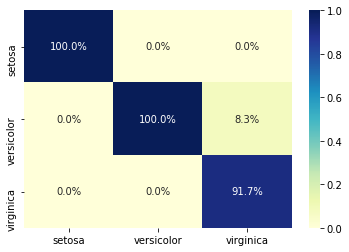

In [13]:
cm = confusion_matrix(y_test,predictions)
labels = ['setosa', 'versicolor', 'virginica']
figure = sns.heatmap(cm / sum(cm), cmap="YlGnBu", annot=True, fmt=".1%", xticklabels=labels, yticklabels=labels)

A confusion matrix can be useful to seeing where our model is struggling. We want 100%s on the diagonal. In this case, it looks like our model does really well on classifying setosa and versicolor but often thinks that virginica is a versicolor! Looking back at the pairplot, we can see the predictors for these classes have similar distributions.

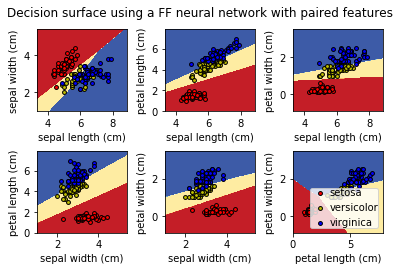

In [14]:
from utils._plot_decision_boundaries import plot_decision_boundaries
plot_decision_boundaries()

In [15]:
from utils._viz_model import viz_model


------------------------------------------------------------------
Vizualize the architecture of a sklearn network.
The network is a feedforward, fully connected neural network.
You must have keras, ann_visualizer, and graphviz installed.
------------------------------------------------------------------



Using TensorFlow backend.


In [16]:
viz_model(clf)

### An example output of the model architecture

![Model Architecture](./docs/network.png)